In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

Today we will explore a data set dedicated to the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. But we have other information that can help us to make a conclusion about the health of patients and practice regression analysis. In any case, I wish you to be healthy! Let's look at our data.

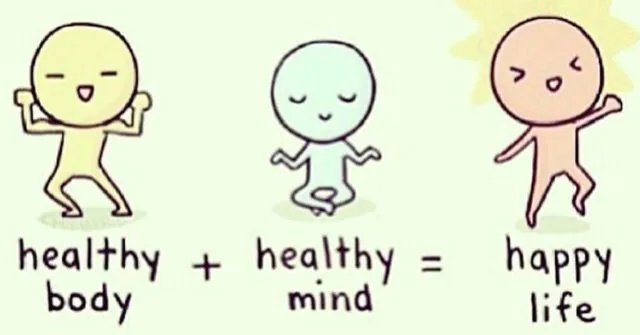

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Prs/Datasets/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Let's check out some observations :**

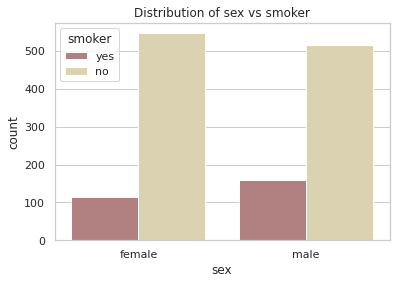

In [6]:
sns.countplot(data=df, x="sex", hue="smoker",palette = 'pink')
plt.title('Distribution of sex vs smoker')
plt.show()

We can notice that there are more male smokers than women smokers. It can be assumed that the total cost of treatment in men will be more than in women, given the impact of smoking. Maybe we'll check it out later. And some more useful visualizations.

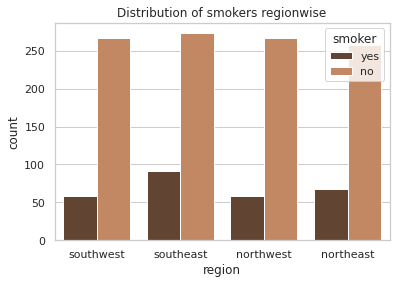

In [7]:
sns.countplot(data=df, x="region", hue="smoker",palette = 'copper')
plt.title('Distribution of smokers regionwise')
plt.show()

We can observe that Southeast region has comparatively more smokers than other regions. All the other regions like southwest,northwest and northeast have more or less same amount of smokers.

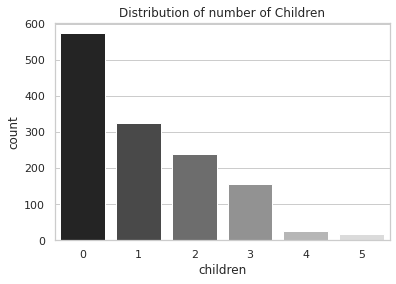

In [8]:
sns.countplot(data=df, x="children",palette = 'gray')
plt.title('Distribution of number of Children')
plt.show()

We can observe that families having 0 child is maximum.Then comes families having 1 child. Families having 5 children is the least.

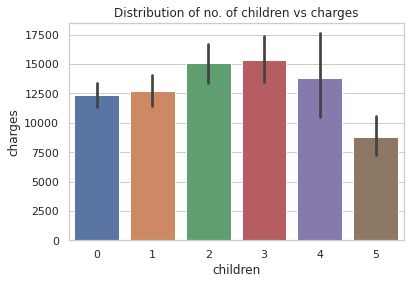

In [9]:
sns.barplot(data=df, x="children", y="charges")
plt.title('Distribution of no. of children vs charges')
plt.show()

Here, we can observe that families having 2 & 3 children are having maximum premium charges.Families having 0 and 1 child are more or less similar.Families having 5 children have the least premium charges.

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
# Label Encoding the sex column :
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['sex'].unique()

array([0, 1])

In [12]:
df['sex'] = df['sex'].astype(int)

In [13]:
# Label Encoding the smoker column :
df['smoker'] = le.fit_transform(df['smoker'])
df['smoker'].unique()

array([1, 0])

In [14]:
df['smoker'] = df['smoker'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


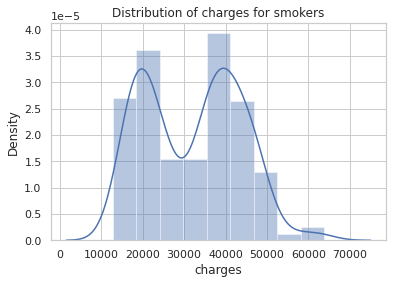

In [16]:
sns.distplot(df[(df.smoker==1)]['charges'])
plt.title('Distribution of charges for smokers')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


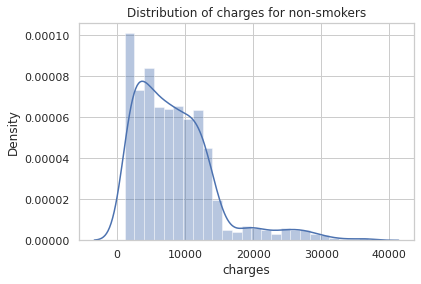

In [17]:
sns.distplot(df[(df.smoker==0)]['charges'],)
plt.title('Distribution of charges for non-smokers')
plt.show()

Smoking patients spend more on treatment. But there is a feeling that the number of non-smoking patients is greater. 

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


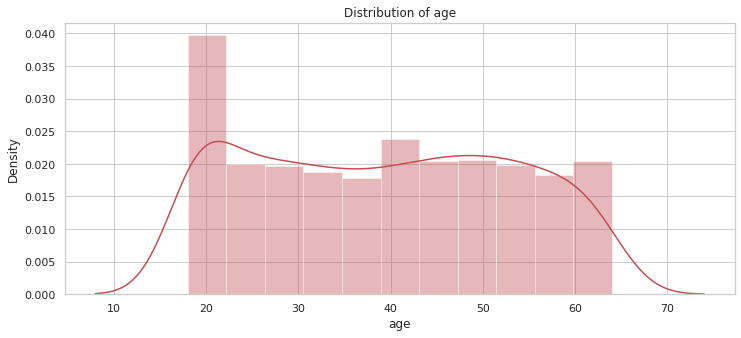

In [19]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(df["age"], color = 'r')

We have patients under 20 in our data set. This is the minimum age of patients in our set. The maximum age is 64 years. My personal interest is whether there are smokers among patients 18 years.

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

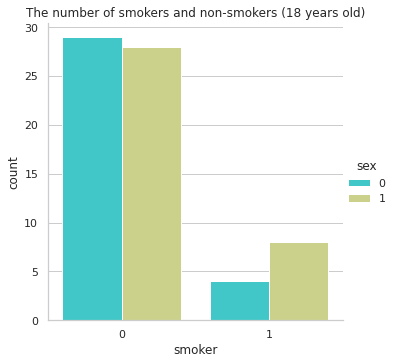

In [20]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=df[(df.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

Many smokers are there in the age of 18 which is such a small age.

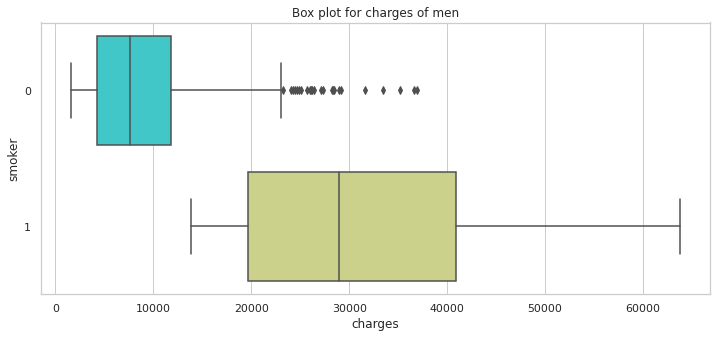

In [21]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 0)] , orient="h", palette = 'rainbow')

In [22]:
# Performing LabelEncoding on region column :
df['region'] = df['region'].replace({'southeast':1,'northeast':0,'southwest':0,'northwest':0})

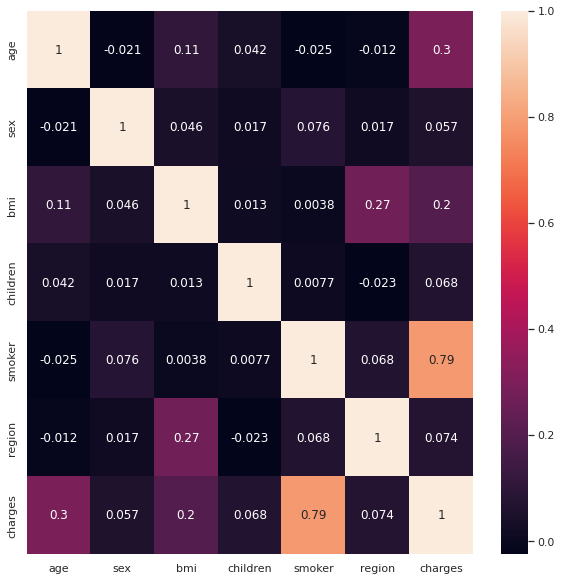

In [23]:
fig, ax = plt.subplots(figsize=(10,10))

corr = df.corr()
sns.heatmap(corr , annot = True , ax=ax)

A strong correlation is observed only with the fact of smoking the patient. 

In [24]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [25]:
print(X)
print(Y)

[[19.    0.   27.9   0.    1.    0.  ]
 [18.    1.   33.77  1.    0.    1.  ]
 [28.    1.   33.    3.    0.    1.  ]
 ...
 [18.    0.   36.85  0.    0.    1.  ]
 [21.    0.   25.8   0.    0.    0.  ]
 [61.    0.   29.07  0.    1.    0.  ]]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [26]:
X.shape , Y.shape

((1338, 6), (1338,))

In [27]:
from sklearn.model_selection import train_test_split 

Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

In [28]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [29]:
Xtrain.shape , Xtest.shape

((1070, 6), (268, 6))

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(Xtrain , Ytrain)

LinearRegression()

In [31]:
from sklearn.metrics import r2_score
model.coef_

array([3716.23215672, -176.07480747, 1981.79519507,  464.70689497,
       9891.68951258, -396.53495103])

In [32]:
model.intercept_

13479.206752242046

In [33]:
model.predict(Xtest)

array([ 8153.89317152, 11542.45307276,  4613.98170508, 11655.61208119,
        9531.32154802,  1558.62022325, 14866.33634329, 32752.75377955,
       29683.76857602, 34484.06207444,  4549.98717949, 10344.62357592,
       26994.8263141 , 13779.51439243, 16558.49451105, 40927.57265369,
       11182.19745927,  5817.93027593, 38687.86752685,  3532.5256247 ,
        7163.45297954, 33627.61214512, 14164.39943164,  9062.11321671,
         581.01631242, 15010.79667566, 14035.35464684,  9734.21405206,
       15668.7935187 ,  7654.77950949,  4725.92518141,  2658.73882867,
       27428.08839561,  4171.69965531,  9239.83088216,  1752.58955871,
       14706.52487998, 14055.39917319,  6104.10976966,  8968.2432994 ,
       13464.02781227, 36343.44127195,  7774.4185352 , 37273.93630461,
       11195.8276504 ,  -138.99704232, 34398.71077894, 27811.89829291,
       13259.2401021 , 12915.86609769,  7320.99279937,  3762.00905713,
        9303.08862721,  -480.42114225,  2401.60450948,  2198.73489787,
      

In [34]:
model.score(Xtest,Ytest)

0.6966950429659824

In [35]:
model.score(Xtrain,Ytrain)

0.7599460670245413

In [36]:
from sklearn.linear_model import Ridge,Lasso

In [37]:
rd = Ridge()
rd.fit(Xtrain,Ytrain)
rd.score(Xtest,Ytest)

0.6969232193932412

In [39]:
ls = Lasso()
ls.fit(Xtrain,Ytrain)
ls.score(Xtest,Ytest)

0.6967299954542392

In [41]:
rd2 = Ridge(alpha = 2)
rd2.fit(Xtrain,Ytrain)
rd2.score(Xtest,Ytest)

0.697149173345043